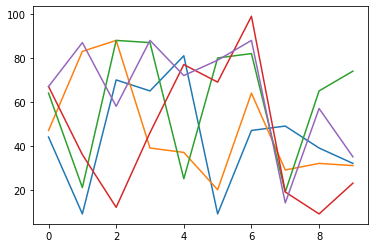

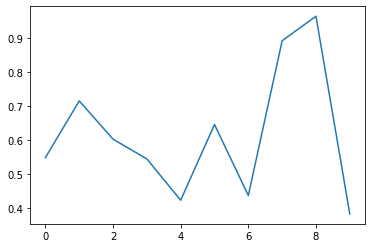

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from offline_RL import val_iter, get_q_func, get_policy, offline_val_iter 

n_action = 5
n_state = 10
np.random.seed(0)
rewards = np.random.randint(0,100,size=(n_state,n_action))
plt.plot(rewards)
np.random.seed(0)
t_matrix = np.random.rand(n_state,n_action,n_state)
plt.figure()
plt.plot(t_matrix[0][0])
sums = []
for i in range(n_state):
    for j in range(n_action):
        t_matrix[i][j] = t_matrix[i][j]/np.sum(t_matrix[i][j])
        sums.append(np.sum(t_matrix[i][j]))
#check to make sure valid transition probabilities have been create
# plt.plot(sums)
gamma = 0.99

Text(0.5, 1.0, 'Expert Policy')

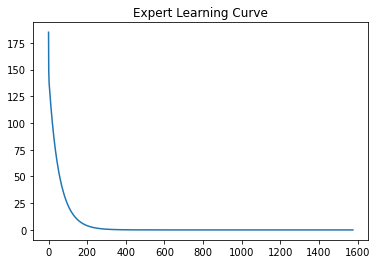

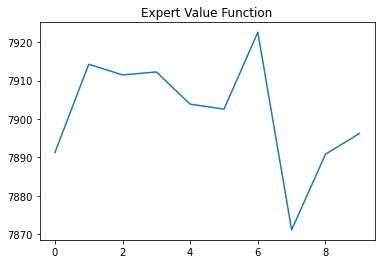

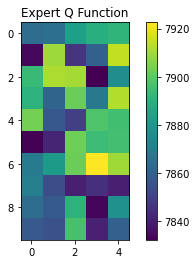

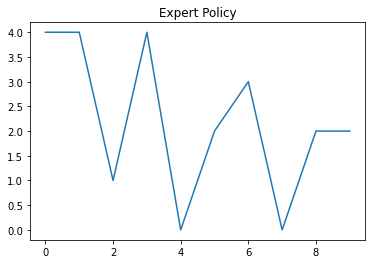

In [2]:
theta = 1e-10
expert_val_func,expert_deltas = val_iter(rewards=rewards,t_matrix=t_matrix,theta=theta,gamma=gamma)
expert_q_func = get_q_func(rewards=rewards,t_matrix=t_matrix,val_func=expert_val_func,gamma=gamma)
expert_policy = get_policy(expert_q_func)

plt.figure(0)
plt.plot(expert_deltas)
plt.title('Expert Learning Curve')
plt.figure(1)
plt.plot(expert_val_func)
plt.title('Expert Value Function')
plt.figure(2)
plt.imshow(expert_q_func)
plt.title('Expert Q Function')
plt.colorbar()
plt.figure(3)
plt.plot(expert_policy)
plt.title('Expert Policy')

In [3]:
dataset = {}
points_per_s_a = 10000
for i in range(n_state):
    dataset[str(i)] = {}
    for j in range(n_action):
        dataset[str(i)][str(j)] = np.random.choice(n_state,size=points_per_s_a,p=t_matrix[i][j])

Text(0.5, 1.0, 'Offline Policy')

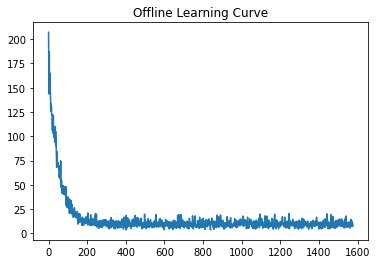

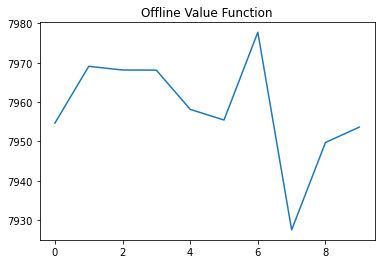

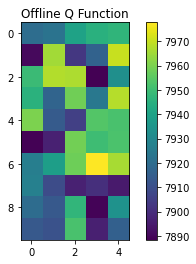

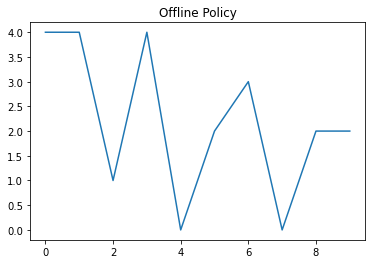

In [4]:
offline_theta = 0.1
offline_val_func,offline_deltas = offline_val_iter(rewards=rewards,theta=offline_theta,gamma=gamma,dataset=dataset,n_next_state=10,max_iter=len(expert_deltas))
offline_q_func = get_q_func(rewards=rewards,t_matrix=t_matrix,val_func=offline_val_func,gamma=gamma)
offline_policy = get_policy(offline_q_func)

plt.figure(0)
plt.plot(offline_deltas)
plt.title('Offline Learning Curve')
plt.figure(1)
plt.plot(offline_val_func)
plt.title('Offline Value Function')
plt.figure(2)
plt.imshow(offline_q_func)
plt.title('Offline Q Function')
plt.colorbar()
plt.figure(3)
plt.plot(offline_policy)
plt.title('Offline Policy')

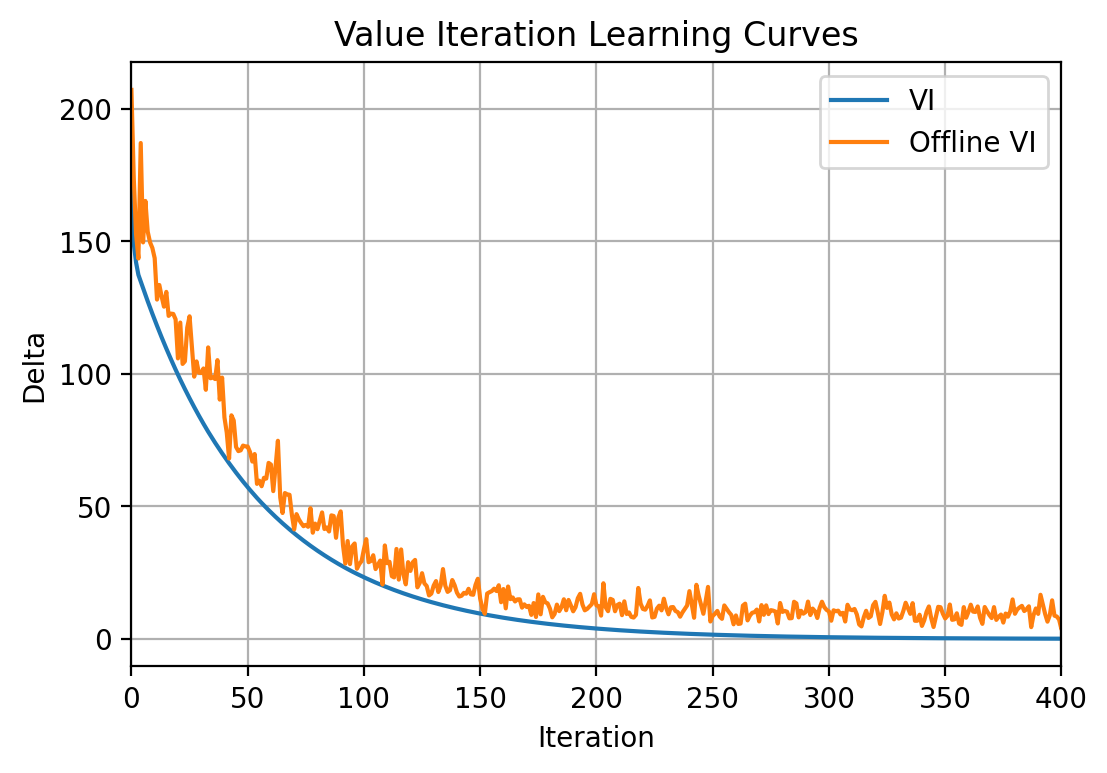

In [9]:
plt.figure(0,dpi=200)
plt.plot(expert_deltas,label='VI')
plt.plot(offline_deltas,label='Offline VI')
plt.grid()
plt.xlabel('Iteration')
plt.ylabel('Delta')
plt.xlim((0,400))
plt.legend()
plt.title('Value Iteration Learning Curves')
plt.savefig('Value Iteration Learning Curves.png')